    Age Gender  Alcohol    SmokingStatus       DietaryHabits  \
0  65.0      0      2.0   Non-smoker         Balanced diet     
1  62.0      1      0.0   Former smoker     High fat diet      
2  62.0      1      1.0   Non-smoker         Mediterranean     
3  58.0      1      3.0   Smoker             Balanced diet     
4  72.0      1      0.0   Non-smoker         High fiber        

    Physical Activity  StressLevels   BMI    SleepHours   DrugUse      Dataset  
0                  3.0     Moderate    25.5          7.0       0.0  no disease  
1                  5.0          Low    30.1          6.0       0.0     disease  
2                  2.0         High    27.3          5.0       1.0  no disease  
3                  1.0     Moderate    29.8          6.0       0.0     disease  
4                  4.0          Low    24.7          8.0       0.0  no disease  
(666, 11)
Index(['Age', 'Gender', 'Alcohol', 'SmokingStatus ', 'DietaryHabits',
       ' Physical Activity ', 'StressLevels', ' B

C:\Users\indian\AppData\Local\Temp\ipykernel_7916\1045205947.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
C:\Users\indian\AppData\Local\Temp\ipykernel_7916\1045205947.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


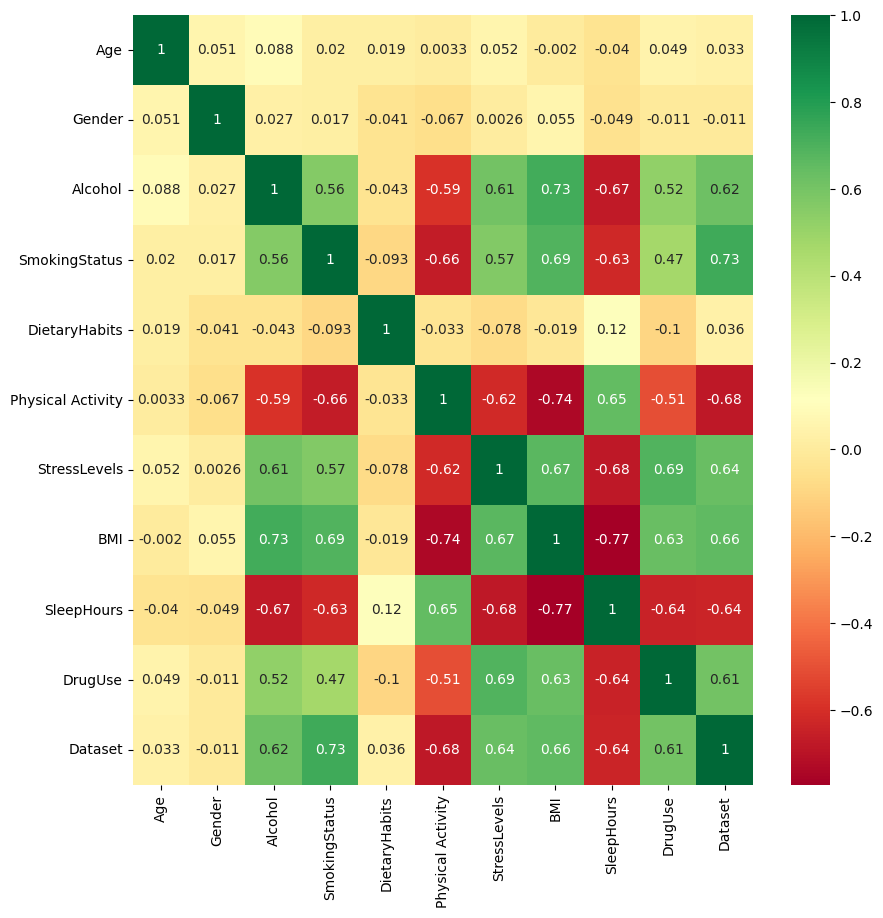

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle
#READ CSV FILE
data= pd.read_csv("C:\\Users\\indian\\Desktop\\liver\\lifess.csv")
print(data.head())
print(data.shape)
print(data.columns)
#DATA CLEANING
print(data.duplicated())
print(data.duplicated().sum())
print(data.drop_duplicates())
print(data.shape)
#CHECKING MISSING VALUES
print(data.isna().sum())
missing_values = data.isnull().sum()
numeric_columns = data.select_dtypes(include=['number']).columns
print("The numeric coumnns are:",numeric_columns)
for column in numeric_columns:
    data[column].fillna(data[column].mean(), inplace=True)


categorical_columns = data.select_dtypes(exclude=['number']).columns
print("The categorical columns are:", categorical_columns)
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)
print("after the missing values:",data.isna().sum())

# Remove leading and trailing spaces from column names
data.columns = data.columns.str.strip()

data['Gender'].value_counts()
data['Gender'] = data['Gender'].replace(['Female','Male'],[0,1])
data['SmokingStatus'].value_counts()
data['SmokingStatus'] = data['SmokingStatus'].replace([' Non-smoker     ',' Former smoker  ',' Smoker         '],[0,1,2])
data['DietaryHabits'].value_counts()
data['DietaryHabits'] = data['DietaryHabits'].replace([' Balanced diet  ',' Mediterranean  ',' High fat diet   ',' High fiber     ',' Low carb diet  '],[1,2,3,4,5])
data['StressLevels'].value_counts()
data['StressLevels'] = data['StressLevels'].replace(['Moderate','Low','High'],[1,0,2])
data['Dataset'].value_counts()
data['Dataset'] = data['Dataset'].replace(['no disease','disease'],[0,1])

# Remove leading and trailing spaces from column names
data.columns = data.columns.str.strip()

#FEATURE SELECTION
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#plt.show()
threshold = 0.4
selected_features = corrmat.columns[corrmat.abs().mean() >threshold]
print("features are:", selected_features )

print(data)

#data['Dataset'] = np.where(data['Dataset'] > threshold, 1, 0)

X = data[['Age', 'Gender', 'Alcohol', 'BMI' , 'DrugUse', 'SmokingStatus',  'StressLevels']]
y = data['Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
svm_model = SVC(kernel='linear')

# Train the SVM model on the training data
svm_model.fit(X_train_std, y_train)
y_pred = svm_model.predict(X_test_std)
# Make predictions on the test data
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)

print("Classification Report svm:\n", classification_rep)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy of the svm is :", accuracy)



# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)
y_pred_log = logreg.predict(X_test_std)
accuracylog = accuracy_score(y_test, y_pred_log)
classification_rep = classification_report(y_test, y_pred_log)
print("Classification Report log:\n", classification_rep)
cm=confusion_matrix(y_test,y_pred_log)
print(cm)
print("accuracy of logreg:",accuracylog)
#knn
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=21, metric='euclidean')
knn_classifier.fit(X_train_std,y_train)
knn_y_pred=knn_classifier.predict(X_test_std)

classification_rep = classification_report(y_test, knn_y_pred)
print("Classification Report knn:\n", classification_rep)
accuracyknn = accuracy_score(y_test, knn_y_pred)
cm=confusion_matrix(y_test,knn_y_pred)
print(cm)
print("Accuracy of the KNeighborsClassifier is :", accuracyknn)


# Save the trained SVM model to a pickle file
with open("taaheer.pkl", "wb") as model_file:
    pickle.dump(svm_model, model_file)




